In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import datetime
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar
from sklearn import linear_model
from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import cross_val_score
import time

%load_ext autoreload
%autoreload 2
from functions import *
from plots import *

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import traffic data

In [8]:
df_traf = pd.DataFrame.from_csv('../data_ski_in_solitude/all_skier_counts.csv')

In [9]:
df_traf.tail()

,away_WP,to_WP,day_of_week,skiers
FormattedDate,,,,
2015-04-22,1958,1950,2,-4053
2015-04-23,1747,1977,3,-3823
2015-04-24,2223,3877,4,-2169
2015-04-25,2606,3399,5,-1376
2015-04-26,4610,2103,6,-3883


# Import snow data

In [10]:
df_met = pd.DataFrame.from_csv('../data_ski_in_solitude/all_snowfall.csv')

In [11]:
df_met.head()

,new_24,basedepth,open_trails,open_lifts,open_percent,mon_day,tot_snow,week_snow_tot,2day_snow_tot,3day_snow_tot,4day_snow_tot,5day_snow_tot,6day_snow_tot
valid_at,,,,,,,,,,,,,
2011-11-10 06:14:00,0,15,0,0,0,11/10,0,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-12 05:56:00,0,18,0,0,0,11/12,0,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-13 05:49:00,1,18,0,0,0,11/13,1,NaN,0,NaN,NaN,NaN,NaN
2011-11-14 05:52:00,3,18,0,0,0,11/14,4,NaN,1,1,NaN,NaN,NaN
2011-11-15 05:54:00,0,18,0,0,0,11/15,4,NaN,4,4,4,NaN,NaN


In [12]:
resamp_time = '1440Min'
df_met = df_met.resample(resamp_time)

In [13]:
df_met.head()

,new_24,basedepth,open_trails,open_lifts,open_percent,tot_snow,week_snow_tot,2day_snow_tot,3day_snow_tot,4day_snow_tot,5day_snow_tot,6day_snow_tot
valid_at,,,,,,,,,,,,
2011-11-10,0,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-12,0,18,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-13,1,18,0,0,0,1,NaN,0,NaN,NaN,NaN,NaN
2011-11-14,3,18,0,0,0,4,NaN,1,1,NaN,NaN,NaN


## Combine the traffic and met data.

In [16]:
df_all = df_traf.join(df_met,how='outer')

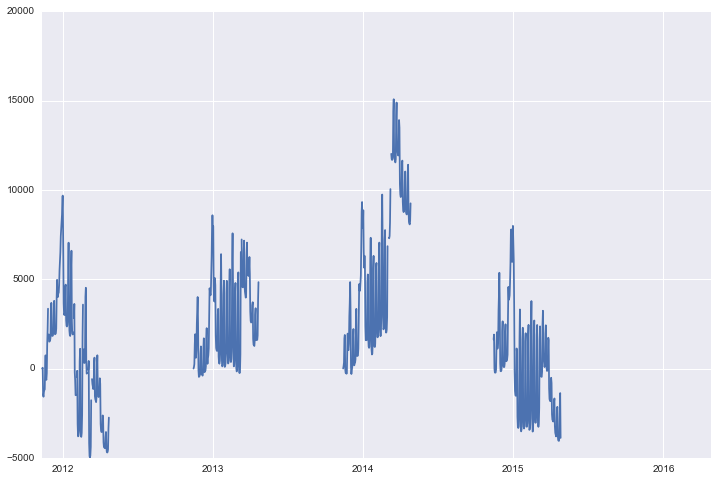

In [18]:
df_all.skiers.plot()